# Import Libraries

In [2]:
import json
import csv
import ast
import pandas as pd 
import re
from datetime import date, datetime
import time
import numpy as np
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

# Import Files

The imported files will use json.loads to load, while will output list of dictionaries.

Each dictionary will represent one post inclusive of the following details:
- Post title
- Post score
- Post ID
- Post URL
- Post comments (list)

In [3]:
bus = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/bus(clean).json', 'r', encoding="utf8").read())
taxi = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/taxi(clean).json', 'r', encoding="utf8").read())
grab = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/grab(clean).json', 'r', encoding="utf8").read())
gojek = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/gojek(clean).json', 'r', encoding="utf8").read())
c_delgro = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/c_delgro(clean).json', 'r', encoding="utf8").read())
ryde = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/ryde(clean).json', 'r', encoding="utf8").read())
tada = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/tada(clean).json', 'r', encoding="utf8").read())
mrt = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/mrt(clean).json', 'r', encoding="utf8").read())
car_r = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/car_r(clean).json', 'r', encoding="utf8").read())
bus_c = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/bus_c(clean).json', 'r', encoding="utf8").read())
t_demand = json.loads(open('../../Data Collection and Preprocessing/Scrapping/Reddit/t_demand(clean).json', 'r', encoding="utf8").read())

# Exploratory Data Analysis (EDA)

The following are the EDA used:
1. Number of post for each list
2. Top 10 most base on score

# Filter the dates by before covid and after covid  

## Create a function for date filter 

In [4]:
def before_covid(data):
    new_list = []

    for post in data:
        if datetime.strptime(post['time created'], "%d/%m/%Y") < datetime.strptime("01/01/2020", "%d/%m/%Y"):
            new_list.append(post)
    
    return new_list

In [5]:
def after_covid(data):
    new_list = []

    for post in data:
        if datetime.strptime(post['time created'], "%d/%m/%Y") > datetime.strptime("31/12/2019", "%d/%m/%Y"):
            new_list.append(post)
    
    return new_list

In [6]:
bus_bcovid = before_covid(bus)
taxi_bcovid = before_covid(taxi)
grab_bcovid = before_covid(grab)
gojek_bcovid = before_covid(gojek)
c_delgro_bcovid = before_covid(c_delgro)
ryde_bcovid = before_covid(ryde)
tada_bcovid = before_covid(tada)
mrt_bcovid = before_covid(mrt)
car_r_bcovid = before_covid(car_r)
bus_c_bcovid = before_covid(bus_c)
t_demand_bcovid = before_covid(t_demand)

In [7]:
bus_acovid = after_covid(bus)
taxi_acovid = after_covid(taxi)
grab_acovid = after_covid(grab)
gojek_acovid = after_covid(gojek)
c_delgro_acovid = after_covid(c_delgro)
ryde_acovid = after_covid(ryde)
tada_acovid = after_covid(tada)
mrt_acovid = after_covid(mrt)
car_r_acovid = after_covid(car_r)
bus_c_acovid = after_covid(bus_c)
t_demand_acovid = after_covid(t_demand)

In [8]:
bus_bcovid

[{'title': 'confession of a petty bus rider',
  'time created': '07/08/2019',
  'score': 2338,
  'id': 'cn5h09',
  'url': 'https://www.reddit.com/r/singapore/comments/cn5h09/confession_of_a_petty_bus_rider/',
  'comments': [{'time created': '07/08/2019',
    'author': '442975',
    'score': 576,
    'comment': 'the hero we need.'},
   {'time created': '07/08/2019',
    'author': 'eternallydepressed2',
    'score': 194,
    'comment': "you're awesome and i wish i had the gumption to do that to idiots who blast their games/videos/music on public transport inconsiderately."},
   {'time created': '07/08/2019',
    'author': 'noobsoldier',
    'score': 135,
    'comment': 'what a boss. fought fire with fire, and won in the end!'},
   {'time created': '07/08/2019',
    'author': 'Zeangrydrunk',
    'score': 121,
    'comment': 'why do people think its ok to play a video at max volume in a public space?'},
   {'time created': '07/08/2019',
    'author': 'bananaterracottapi',
    'score': 123,

In [9]:
bus_acovid

[{'title': 'kudos to sanhe construction for transporting its workers on a bus! 👏🏻',
  'time created': '01/09/2021',
  'score': 2014,
  'id': 'pfnwl5',
  'url': 'https://i.redd.it/5ji1w43h2uk71.jpg',
  'comments': [{'time created': '01/09/2021',
    'author': 'Bcpjw',
    'score': 180,
    'comment': 'yes, lead the way!'},
   {'time created': '01/09/2021',
    'author': 'Reallynotspiderman',
    'score': 744,
    'comment': 'on one hand, this should be the norm and celebrating the bare minimum seems silly to me. on the other hand, if congratulating companies for safely transporting their workers leads to more companies doing so, then hell yeah we should congratulate them'},
   {'time created': '01/09/2021',
    'author': 'SwordLaker',
    'score': 23,
    'comment': 'civilization has finally arrived.'},
   {'time created': '01/09/2021',
    'author': 'wholesomepancake',
    'score': 21,
    'comment': 'we need more construction companies like this. treat our migrant workers humanely!'},

## 1. Post Frequency for Each Group

The following bar graph shows the number of post each group has. It gives an idea of the number of conversations the public has with regards to the specific topics. 

In [10]:
group_name = ['bus', 'taxi', 'grab', 'gojek', 'c_delgro', 'ryde', 'tada', 'mrt', 'car_r', 'bus_c', 't_demand']

In [11]:
barplot_df = pd.DataFrame({'Brands': group_name[:-1],
                           'Total Post': [len(bus), len(taxi), len(grab),len(gojek), len(c_delgro), len(ryde), len(tada), len(mrt), len(car_r), len(bus_c)]})

barplot_df = barplot_df.sort_values(by = 'Total Post')

<AxesSubplot:ylabel='Brands'>

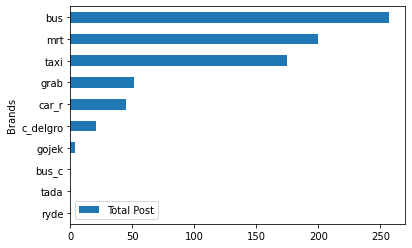

In [12]:
barplot_df.plot.barh(x = 'Brands')

In [13]:
barplot_df_bcovid = pd.DataFrame({'Brands': group_name[:-1],
                           'Total Post': [len(bus_bcovid), len(taxi_bcovid), len(grab_bcovid),len(gojek_bcovid), len(c_delgro_bcovid), len(ryde_bcovid), len(tada_bcovid), len(mrt_bcovid), len(car_r_bcovid), len(bus_c_bcovid)]})

barplot_df_bcovid = barplot_df_bcovid.sort_values(by = 'Total Post')

<AxesSubplot:ylabel='Brands'>

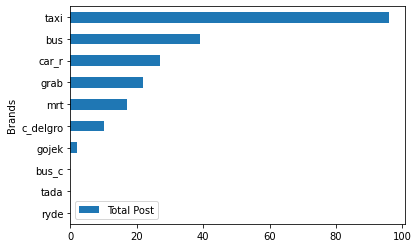

In [14]:
barplot_df_bcovid.plot.barh(x = 'Brands')

In [15]:
barplot_df_acovid = pd.DataFrame({'Brands': group_name[:-1],
                           'Total Post': [len(bus_acovid), len(taxi_acovid), len(grab_acovid),len(gojek_acovid), len(c_delgro_acovid), len(ryde_acovid), len(tada_acovid), len(mrt_acovid), len(car_r_acovid), len(bus_c_acovid)]})

barplot_df_acovid = barplot_df_acovid.sort_values(by = 'Total Post')

<AxesSubplot:ylabel='Brands'>

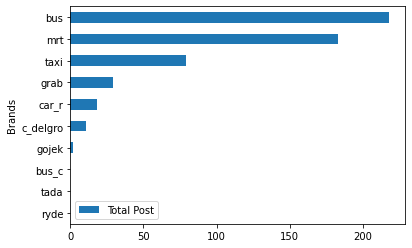

In [16]:
barplot_df_acovid.plot.barh(x = 'Brands')

## 2. Preview The Top 10 Post for Each Group

To give a rough idea of what are some of the conversations happening for each topic, we will print out the top 10 post by scores.

# 2.1 Preview the Top 10 Post Before Covid

In [17]:
bus_bcovid = sorted(bus_bcovid, key = lambda i: i['score'], reverse = True)
taxi_bcovid = sorted(taxi_bcovid, key = lambda i: i['score'], reverse = True)
grab_bcovid = sorted(grab_bcovid, key = lambda i: i['score'], reverse = True)
gojek_bcovid = sorted(gojek_bcovid, key = lambda i: i['score'], reverse = True)
c_delgro_bcovid = sorted(c_delgro_bcovid, key = lambda i: i['score'], reverse = True)
ryde_bcovid = sorted(ryde_bcovid, key = lambda i: i['score'], reverse = True)
tada_bcovid = sorted(tada_bcovid, key = lambda i: i['score'], reverse = True)
mrt_bcovid = sorted(mrt_bcovid, key = lambda i: i['score'], reverse = True)
car_r_bcovid = sorted(car_r_bcovid, key = lambda i: i['score'], reverse = True)
bus_c_bcovid = sorted(bus_c_bcovid, key = lambda i: i['score'], reverse = True)
t_demand_bcovid = sorted(t_demand_bcovid, key = lambda i: i['score'], reverse = True)

In [18]:
print('=====================Top 10 Post for Bus Before Covid=====================')
for i in range(10):
    print(f"{i+1}. {bus_bcovid[i]['title']}")

=====================Top 10 Post for Bus Before Covid=====================
1. confession of a petty bus rider
2. prc missed her stop and demands bus driver to u-turn back by getting down and blocking the bus
3. there was a big blue banana at my bus stop last night
4. bad placement of bus stop and taxi stand?
5. faulty bus fare reader penalises users unfairly and neither bus company nor regulatory body really seem to care
6. woman loses her autistic kid, proceeds to write a forum letter blaming public transport for letting the kid take a bus to changi airport
7. hi. i'm a singapore bus enthusiast i.e bus otaku. ama!
8. bus collides with roof of taxi stand at junction 8
9. on-demand bus services beeline, grabshuttle shutting down end-2019
10. comfortdelgro to acquire 51 per cent stake in uber's rental car business


In [19]:
print('=====================Top 10 Post for MRT Before Covid=====================')
for i in range(10):
    print(f"{i+1}. {mrt_bcovid[i]['title']}")

=====================Top 10 Post for MRT Before Covid=====================
1. auntie forces mrt door open and gets herself stuck at little india. insane strength/10
2. why the auntie force open the mrt door
3. i did a redesign of the mrt system map for 2040
4. soon to be installed in all mrt trains near you.
5. does anyone else prefer previous mrt train with no digital screen?
6. found some old mrt card from when i used to live in singapura.
7. a little mrt easter egg in the new season of the expanse
8. notice flock of birds dancing nearby bedok mrt sky today..
9. k. shanmugam comments on the mrt molest case
10. how much has singapore lost due to the mrt breakdowns this year?


In [20]:
print('=====================Top 10 Post for Taxi Before Covid=====================')
for i in range(10):
    print(f"{i+1}. {taxi_bcovid[i]['title']}")

=====================Top 10 Post for Taxi Before Covid=====================
1. i understand some people here seem to miss the old taxis, found this picture i took 6 years ago
2. so on my way back home, my taxi broke down, i walked the highway, and a random uncle offered to send me back! :')
3. taxi touting at ion orchard
4. 23yo edgelord throws $1000 in taxi driver's face and proceeds to insult police officer
5. kathy was a ‘people person’, loved by many: family, friends of nus undergrad who died in clementi taxi accident
6. bad placement of bus stop and taxi stand?
7. taxi service on ubin
8. nissan cedric taxi circa 2008.
9. last day at work: taxi driver retires after 17 years
10. tomica now makes miniature versions of the comfortdelgro toyota prius taxi.


In [21]:
print('=====================Top 10 Post for Grab Before Covid=====================')
for i in range(10):
    print(f"{i+1}. {grab_bcovid[i]['title']}")

=====================Top 10 Post for Grab Before Covid=====================
1. rant about grab
2. uber is preparing to sell southeast asia unit to grab in exchange for stake in company
3. justgrab passenger calls taxi driver ‘absolute failure of a man’ during argument
4. full-time grab drivers, how are your earnings? and has it been worth it so far?
5. alternative transport idea for grab
6. since when did grab become more expensive than regular taxis? isn't the whole point was to be cheaper and more efficient???
7. grab - departing from changi airport? taxi option removed!
8. on-demand bus services beeline, grabshuttle shutting down end-2019
9. what are your most memorable grab/taxi rides?
10. grab to roll out fixed-fare taxi service


In [22]:
print('=====================Top 10 Post for Car Rental Before Covid=====================')
for i in range(10):
    print(f"{i+1}. {car_r_bcovid[i]['title']}")

=====================Top 10 Post for Car Rental Before Covid=====================
1. comfortdelgro to acquire 51 per cent stake in uber's rental car business
2. man who drove rental car illegally pleads guilty to causing the death of motorcycle pillion rider
3. driver knocks over rental car company worker, 5km police car chase in telok blangah ensues
4. more rental cars being used to commit crimes - st
5. uber’s lion city rentals to lease cars to casual drivers, dismisses suggestion it is a desperate move
6. uber's lion city rentals finally sold
7. former car rental company clerk jailed for forging cheques, pocketing over s$1m over five years
8. rental of "auspicious" luxury cars is hot this chinese new year
9. 39-year-old rental car driver gets 14 months' jail for stealing petrol, drug-related offences
10. anyone tried bluesg car rental?


In [23]:
print('=====================Top 10 Post for Comfort Delgro Before Covid=====================')
for i in range(10):
    print(f"{i+1}. {c_delgro_bcovid[i]['title']}")

=====================Top 10 Post for Comfort Delgro Before Covid=====================
1. tomica now makes miniature versions of the comfortdelgro toyota prius taxi.
2. passenger alights from moving taxi in middle of ecp after cab driver suffers blackout; comfort delgro apologises
3. comfortdelgro to acquire 51 per cent stake in uber's rental car business
4. comfortdelgro sees biggest taxi booking rise since 2014
5. comfort delgro fires taxi driver with history of overcharging customers after passenger receives $70.75 bill
6. comfortdelgro witnessing 'uptick' in bookings for taxis
7. comfortdelgro is third taxi firm with plans to introduce surge pricing
8. go-jek is in talks with former uber ally comfortdelgro, singapore’s top taxi firm
9. comfortdelgro's new fully electric taxis go on trial in singapore
10. private hire driver or comfortdelgro?


In [24]:
print('=====================Top 10 Post for Gojek Before Covid=====================')
for i in range(len(gojek_bcovid)):
    print(f"{i+1}. {gojek_bcovid[i]['title']}")

=====================Top 10 Post for Gojek Before Covid=====================
1. should i work for grab or gojek?
2. any tips to get taxi booking fees down? i have kids, so {gojek,regular grab} is not an option.


# 2.2  Preview the Top 10 Post After Covid

In [25]:
bus_acovid = sorted(bus_acovid, key = lambda i: i['score'], reverse = True)
taxi_acovid = sorted(taxi_acovid, key = lambda i: i['score'], reverse = True)
grab_acovid = sorted(grab_acovid, key = lambda i: i['score'], reverse = True)
gojek_acovid = sorted(gojek_acovid, key = lambda i: i['score'], reverse = True)
c_delgro_acovid = sorted(c_delgro_acovid, key = lambda i: i['score'], reverse = True)
ryde_acovid = sorted(ryde_acovid, key = lambda i: i['score'], reverse = True)
tada_acovid = sorted(tada_acovid, key = lambda i: i['score'], reverse = True)
mrt_acovid = sorted(mrt_acovid, key = lambda i: i['score'], reverse = True)
car_r_acovid = sorted(car_r_acovid, key = lambda i: i['score'], reverse = True)
bus_c_acovid = sorted(bus_c_acovid, key = lambda i: i['score'], reverse = True)
t_demand_acovid = sorted(t_demand_acovid, key = lambda i: i['score'], reverse = True)

In [26]:
print('=====================Top 10 Post for Bus After Covid=====================')
for i in range(10):
    print(f"{i+1}. {bus_acovid[i]['title']}")

=====================Top 10 Post for Bus After Covid=====================
1. tried my hand at editing this shot of an empty upper deck of a bus to give off a sinister/apocalyptic vibe
2. someone misplaced their glasses at a bus stop, i left it in a ziplock with a note...1 week ago. i noticed this today.
3. tifu by letting an auntie board the bus ahead of me
4. shoutout to spf for sending my student to school after he overslept on bus 170
5. kudos to sanhe construction for transporting its workers on a bus! 👏🏻
6. bus stop on a lonely night.
7. who exactly designed this confusing bus directory sign? i can’t figure out where exactly am i until 4 bus stops into my journey.
8. this really neat window placement makes it looks futuristic, yet soothing at the same time. credit: rainbowbus
9. bus flipped at bukit batok bus interchange
10. firefighters and policemen attending to a man aggressively chilling on a bus stop


In [27]:
print('=====================Top 10 Post for MRT After Covid=====================')
for i in range(10):
    print(f"{i+1}. {mrt_acovid[i]['title']}")

=====================Top 10 Post for MRT After Covid=====================
1. someone redesigned all our mrt stations as famous logos
2. at the ang mo kio mrt underpass!! lads are straight vibing, gave em $5
3. repost of a friend's impressions of our mrt stations reimagined in the style of tokyo's train station signs
4. lta drafting mrt plans in 2002:
5. hdb price (psf) by mrt station
6. orchard mrt sure has some great facilities
7. i did a katana photoshoot at an mrt station
8. current mrt map but with dark mode
9. when you know the mrt gonna be full (blue line)
10. throwback to the big mrt breakdown on the night of 15 december 2011, when a window was smashed for ventilation


In [28]:
print('=====================Top 10 Post for Taxi After Covid=====================')
for i in range(10):
    print(f"{i+1}. {taxi_acovid[i]['title']}")

=====================Top 10 Post for Taxi After Covid=====================
1. a old photo of crown taxis stacked up against one another for scrap
2. taxi as wedding car
3. taxi driver's armpit sweat output 1000%
4. in 1997,toyota’s crown comfort was bought as taxis for hong kong and singapore and came to our shores in late 97 and had been serving till 2014.whether it’s a quick stroll to buy supplies or a few from distant land,growing up in the 2000s made this childhood favourites
5. taxi billboards. i just realised they disappeared. who remembers when and why?
6. s'pore boy, 15, takes father's taxi out for joyride with 2 friends aged 14 & 15, crashes into building
7. bringing up the rear of the mobile column, the unsung heroes of cb! taxi driver and food delivery specialists!
8. 6:40 pm, where this taxi station would be bustling 2 years ago, no person or chassis can be seen now.
9. rare london tx4 smrt taxi spotted in geylang
10. comfortdelgro to launch all-in-one app offering taxi, pr

In [29]:
print('=====================Top 10 Post for Grab After Covid=====================')
for i in range(10):
    print(f"{i+1}. {grab_acovid[i]['title']}")

=====================Top 10 Post for Grab After Covid=====================
1. a rant on grabfood
2. a rant on grabfood and din tai fung (nex)
3. encountered a grab car xl today
4. grab rewards excels at being pathetic with rewarding members. $2 off for 1300 points. rewards 1.5 points per $1 spent. averaging $860 just to receive $2 off.
5. s'pore elderly man forgets how to go home after haircut, kind stranger on mrt arranges grab ride back
6. grab driver interrogators passengers and tests how singaporean they are (reposted removing identifying info)
7. drivers say s$1 fare hike by grab not helpful, commission taken from earnings should be reduced instead
8. this is the kind of customer hostile garbage that lets grab & gojek flourish. how does any customer facing organisation think that limiting payment methods in 2021 is going to be net upside??
9. grab to raise ride-hailing fares by $1 from june 1
10. commentary: could s$1 ride-hailing fee hike hurt grab more than it realises?


In [30]:
print('=====================Top 10 Post for Car Rental After Covid=====================')
for i in range(10):
    print(f"{i+1}. {car_r_acovid[i]['title']}")

=====================Top 10 Post for Car Rental After Covid=====================
1. inspired by all the electric rental cars that overtake me on expressways.
2. comfortdelgro to launch all-in-one app offering taxi, private bus, car rental and leasing services
3. demand for interim rental flats under hdb scheme doubled last year amid bto construction delays
4. help with taxi rental etc during medical leave
5. electric-car sharing service bluesg reaches its one millionth rental
6. former senior minister of state for transport lam pin min joins car rental firm lumens as senior adviser
7. point a to b car rental
8. is rental the future of singapore living?
9. car rental apps
10. car rental that provides manual car?


In [31]:
print('=====================Top 10 Post for Comfort Delgro After Covid=====================')
for i in range(10):
    print(f"{i+1}. {c_delgro_acovid[i]['title']}")

=====================Top 10 Post for Comfort Delgro After Covid=====================
1. comfortdelgro to launch all-in-one app offering taxi, private bus, car rental and leasing services
2. comfortdelgro cabby tells passenger he need not pay s$8.32 trip if he no cash
3. my class 2b experience at comfortdelgro driving centre (course structure, tips & costs)
4. teen, 18, finds silly loophole in comfortdelgro app, books s$2,600 worth of taxi rides for s$0
5. psa: if you use the grab credit card and zig (comfort delgro app), check your transactions for unauthorized transactions (last night)
6. comfortdelgro taxi drivers to help deliver redmart groceries
7. does anyone here know whether comfortdelgro (formerly ntuc taxis) cab drivers were ever issued shares (similar to singtel ones) for being part of the organisation?
8. comfortdelgro taxi cabbies offering medical supplies delivery service
9. comfortdelgro driving centre
10. terminating confortdelgro driving centre account, and getting acco

In [32]:
print('=====================Top 10 Post for Gojek After Covid=====================')
for i in range(len(gojek_acovid)):
    print(f"{i+1}. {gojek_acovid[i]['title']}")

=====================Top 10 Post for Gojek After Covid=====================
1. this is the kind of customer hostile garbage that lets grab & gojek flourish. how does any customer facing organisation think that limiting payment methods in 2021 is going to be net upside??
2. report: grab ceo demands strong control in merger deal with gojek


## 3. Visualize Wordcloud of topics

In [33]:
def word_cloud_title(data, stopword, data_name):
    message = []

    for topic in data:
        message.append(topic['title'])
    
    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    print(f"========================{data_name}========================")
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

In [34]:
#Define stopwords
#Remove brand names

stopwords = set(STOPWORDS)
stopwords.update(['comfort', "delgro", 'grab', 'smrt', 'tada', 'gojek', 'comfortdelgro', 'bus', 'mrt', 'taxi', 'cab','interchange', 'rental', 'car rental', 'car', 'public transport', 'train', 'public', 'transport', 'Singapore', 'taxis',
'stop', 'will', 'uber','driver', 'drivers','s', 'buses', 'station', 'sbs', 'transit', 'sbs transit', 'map', 'stations', 'station', 'line', 'new', 'man'])

# 3.1 Wordcloud for Post Before Covid

========================bus before covid========================


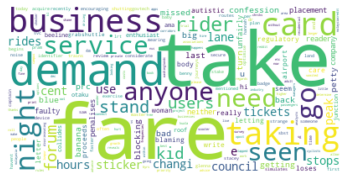



========================mrt before covid========================


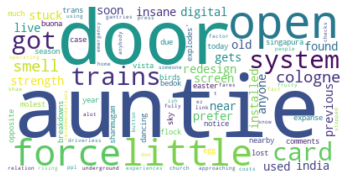



========================taxi before covid========================


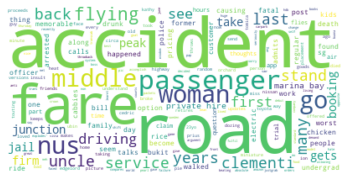



========================grab before covid========================


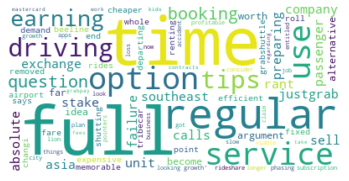



========================car rental before covid========================


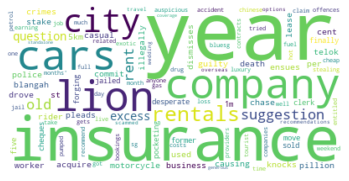



========================comfort delgro before covid========================


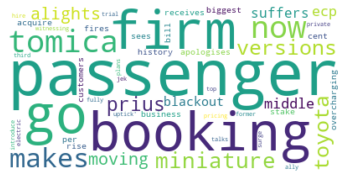



========================gojek before covid========================


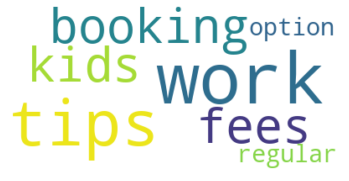

In [35]:
word_cloud_title(bus_bcovid, stopwords, 'bus before covid')
word_cloud_title(mrt_bcovid, stopwords, 'mrt before covid')
word_cloud_title(taxi_bcovid, stopwords, 'taxi before covid')
word_cloud_title(grab_bcovid, stopwords, 'grab before covid')
word_cloud_title(car_r_bcovid, stopwords, 'car rental before covid')
word_cloud_title(c_delgro_bcovid, stopwords, 'comfort delgro before covid')
word_cloud_title(gojek_bcovid, stopwords, 'gojek before covid')

========================bus after covid========================


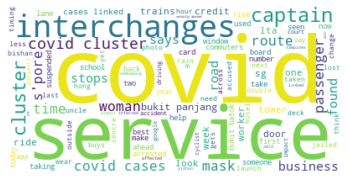



========================mrt after covid========================


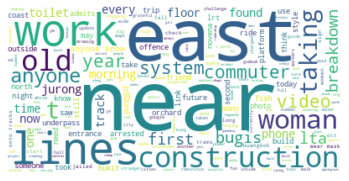



========================taxi after covid========================


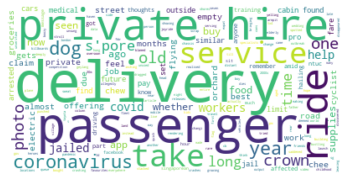



========================grab after covid========================


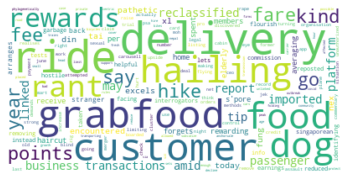



========================car rental after covid========================


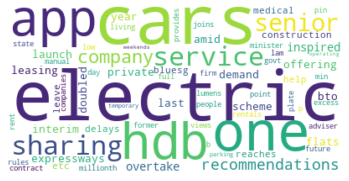



========================comfort delgro after covid========================


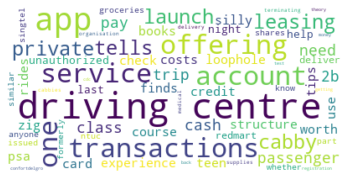



========================gojek after covid========================


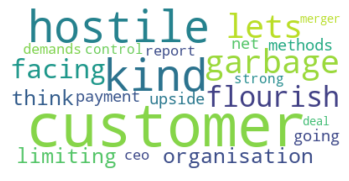

In [36]:
word_cloud_title(bus_acovid, stopwords, 'bus after covid')
word_cloud_title(mrt_acovid, stopwords, 'mrt after covid')
word_cloud_title(taxi_acovid, stopwords, 'taxi after covid')
word_cloud_title(grab_acovid, stopwords, 'grab after covid')
word_cloud_title(car_r_acovid, stopwords, 'car rental after covid')
word_cloud_title(c_delgro_acovid, stopwords, 'comfort delgro after covid')
word_cloud_title(gojek_acovid, stopwords, 'gojek after covid')

## 4. Visualize Wordcloud of comments

In [37]:
def word_cloud_comment(data, stopword, data_name):
    message = []

    for topic in data:
        for com in topic['comments']:
            message.append(com['comment'])
    
    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    print(f"========================{data_name}========================")
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

In [38]:
stopwords.update(['people', 'said', 'cars', 'one', 'know', 'take', 'see', 'well', 'got', 'go', 'make', 'way', 'think', 'even', 
'going', 'really', 'see', 'want', 'still', 'now', 'back', 'need', 'look', 'u', 'lot', 'much', 'say', 'company', 'sure', 'thing', 'drive', 'ride', 'time', 'https',
'rent', 'right', 'year', 'day','try', 'use', 'show', 'hour', 'app'])

# 4.1 Wordcloud for Comments Before Covid

========================bus before covid========================


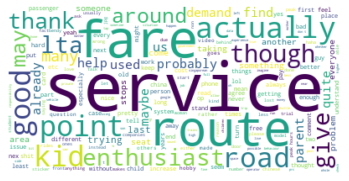



========================mrt before covid========================


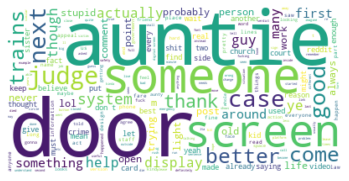



========================taxi before covid========================


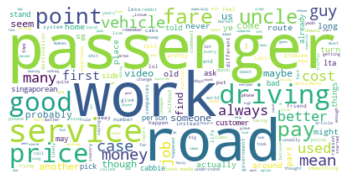



========================grab before covid========================


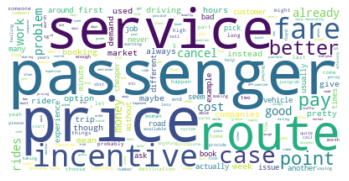



========================car rental before covid========================


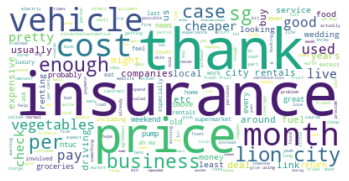



========================comfort delgro before covid========================


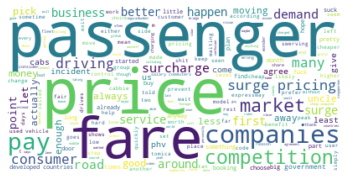



========================gojek before covid========================


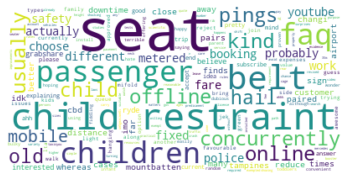

In [39]:
word_cloud_comment(bus_bcovid, stopwords, 'bus before covid')
word_cloud_comment(mrt_bcovid, stopwords, 'mrt before covid')
word_cloud_comment(taxi_bcovid, stopwords, 'taxi before covid')
word_cloud_comment(grab_bcovid, stopwords, 'grab before covid')
word_cloud_comment(car_r_bcovid, stopwords, 'car rental before covid')
word_cloud_comment(c_delgro_bcovid, stopwords, 'comfort delgro before covid')
word_cloud_comment(gojek_bcovid, stopwords, 'gojek before covid')

In [40]:
stopwords.update(['lta', 'lol', 'next', 'many', 'probably', '2b'])

========================bus after covid========================


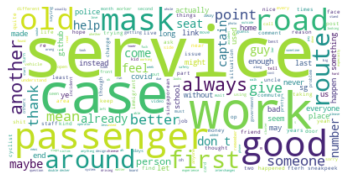



========================mrt after covid========================


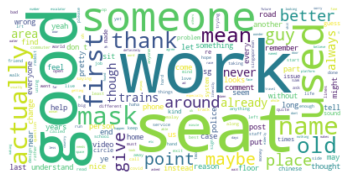



========================taxi after covid========================


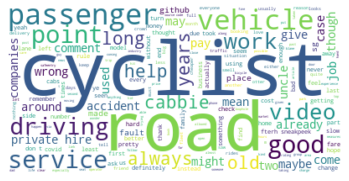



========================grab after covid========================


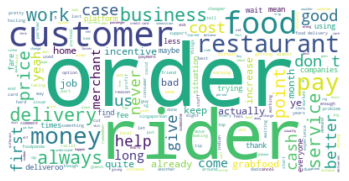



========================car rental after covid========================


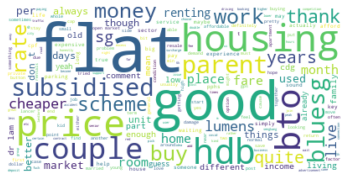



========================comfort delgro after covid========================


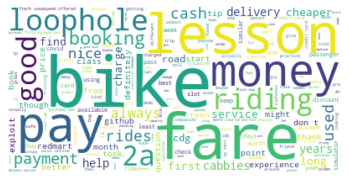



========================gojek after covid========================


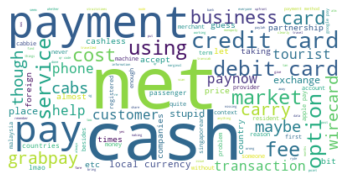

In [41]:
word_cloud_comment(bus_acovid, stopwords, 'bus after covid')
word_cloud_comment(mrt_acovid, stopwords, 'mrt after covid')
word_cloud_comment(taxi_acovid, stopwords, 'taxi after covid')
word_cloud_comment(grab_acovid, stopwords, 'grab after covid')
word_cloud_comment(car_r_acovid, stopwords, 'car rental after covid')
word_cloud_comment(c_delgro_acovid, stopwords, 'comfort delgro after covid')
word_cloud_comment(gojek_acovid, stopwords, 'gojek after covid')

In [42]:
with open('../../Data Collection and Preprocessing/Scrapping/Reddit/bus_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(bus_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/mrt_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(mrt_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/taxi_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(taxi_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/grab_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(grab_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/car_r_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(car_r_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/c_delgro_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(c_delgro_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/gojek_acovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(gojek_acovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/bus_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(bus_bcovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/mrt_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(mrt_bcovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/taxi_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(taxi_bcovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/grab_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(grab_bcovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/car_r_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(car_r_bcovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/c_delgro_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(c_delgro_bcovid, indent=4))

with open('../../Data Collection and Preprocessing/Scrapping/Reddit/gojek_bcovid.json', 'w', encoding = 'utf-8') as f:
    f.write(json.dumps(gojek_bcovid, indent=4))